In [1]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 94 (delta 5), reused 0 (delta 0), pack-reused 79
Receiving objects: 100% (94/94), 33.83 MiB | 29.61 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from PIL import Image, ImageDraw

Размерность набора данных: (1797, 64)
Вектор изображения: [[17 17 17 17 17 17 17 17 17 17 16 16 16 16 16 17 17 17 16 16 17 17 17 17
  17 17 16 16 16 16 17 17 17 17 16 16 17 16 16 17 17 17 17 17 17 16 16 17
  17 17 16 17 17 16 16 17 17 17 16 16 16 16 17 17]]


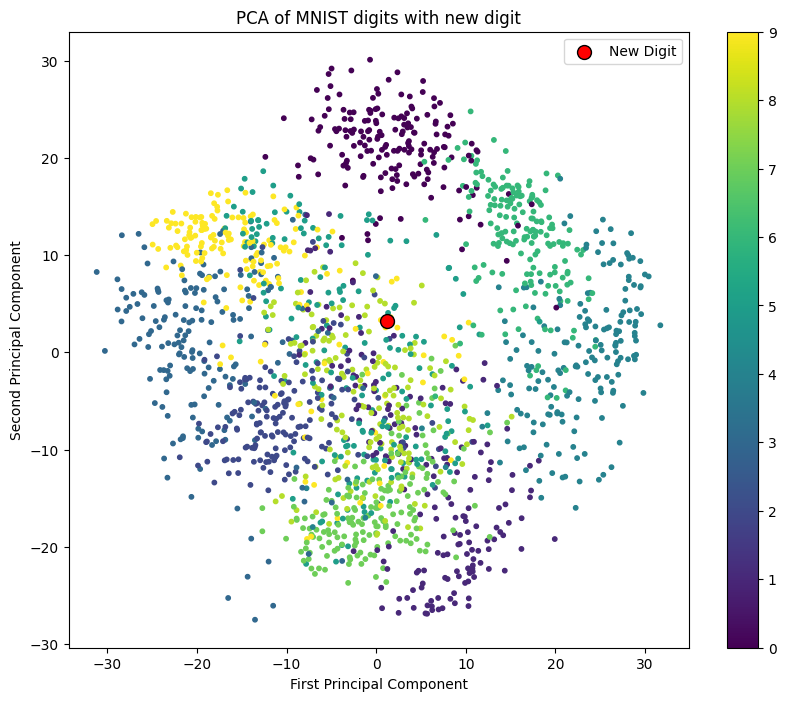

<Figure size 640x480 with 0 Axes>

In [5]:
# Загрузка набора данных о рукописных цифрах MNIST из sklearn
digits = load_digits()
X = digits.data
y = digits.target

# Преобразование изображений в 64-мерный вектор (это уже сделано в sklearn load_digits)
print("Размерность набора данных:", X.shape)

# Методом главных компонент спроецируем эти вектора на плоскость, оставив только две главные компоненты
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Отображение цифр на плоскости
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar()

# Нарисуйте самостоятельно цифру, сохраните ее изображение в файл
img = Image.new('L', (8, 8), color=255)  # создаем белый квадрат 8x8 пикселей
draw = ImageDraw.Draw(img)
draw.text((2, -1), '5', fill=0)  # рисуем цифру 5 черным цветом

# Масштабируем изображение к тому же размеру, что и в MNIST (8x8)
img = img.resize((8, 8))
img_data = np.array(img).reshape(1, -1)

# Преобразуем изображение в 64-мерный вектор
img_data = 16 - img_data  # инвертируем цвета чтобы соответствовать MNIST
print("Вектор изображения:", img_data)

# Применяем PCA к новому изображению
img_pca = pca.transform(img_data)

# Отображение новой цифры на том же графике
plt.scatter(img_pca[0, 0], img_pca[0, 1], c='red', edgecolors='black', s=100, label='New Digit')
plt.legend()
plt.title('PCA of MNIST digits with new digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Сохраняем файл в colab
plt.savefig('mnist_pca_with_new_digit.png')